# Gold Price Prediction Using Machine Learning


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

### Data collection and preprocessing

In [2]:
#loading csv data to pandas dataframe
gold_data =pd.read_csv('C:/Users/Raj/Desktop/goldprice.csv')

In [3]:
gold_data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [4]:
#print first 5 rows of the dataset 
gold_data.head(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
gold_data.tail(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
#number of rows and column
gold_data.shape

(2290, 6)

In [7]:
#getting some basic information
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
#checking number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
#getting the statistical measures of data 
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [10]:
#corelation
#1.Positive Correlation
#2.Negative Correlation

In [11]:
correlation=gold_data.corr()

C:\Users\Raj\AppData\Local\Temp\ipykernel_15512\361041759.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=gold_data.corr()


<Axes: >

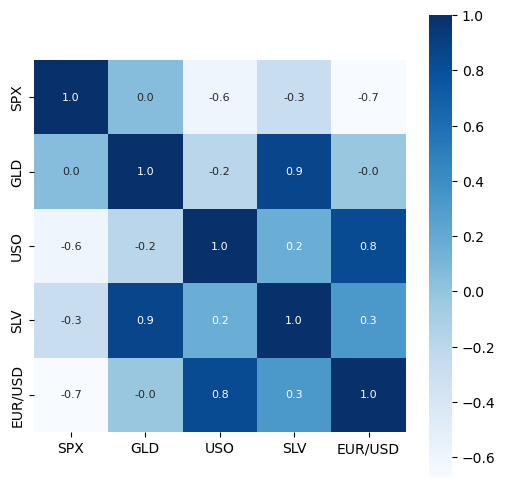

In [12]:
#constructing heatmap to understand corelation 
plt.figure(figsize=(6,6))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap="Blues")

In [13]:
#correlation values of GlD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\Raj\AppData\Local\Temp\ipykernel_15512\2557223457.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

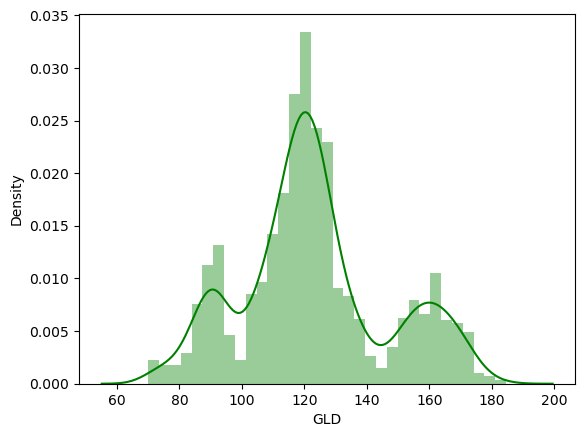

In [14]:
#check the distribution of gold price
sns.distplot(gold_data['GLD'],color='green')

In [15]:
#spliting features and target
x=gold_data.drop(['Date','GLD'],axis=1)

In [16]:
y=gold_data['GLD']

In [17]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [18]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [19]:
#splitting into training data and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [20]:
#model training : Random Forest Regressor
regressor=RandomForestRegressor(n_estimators=100)

In [21]:
#training model
regressor.fit(x_train,y_train)

RandomForestRegressor()

# Model Evaluation

In [22]:
#prediction on test data
test_data_prediction=regressor.predict(x_test)

In [23]:
print(test_data_prediction)

[168.47439926  81.91979998 116.05060036 127.73330075 120.48650137
 154.65899749 150.18279815 125.94900022 117.45619866 126.03730044
 116.62590103 172.37060085 141.32349813 167.83759796 115.16310016
 117.38180053 139.50490311 169.93640093 159.32520301 157.06009949
 155.06710012 125.07320014 175.45599952 156.70260317 125.3294005
  93.80679988  77.52590001 120.54020019 119.06989905 167.57280086
  88.22650057 125.05330003  91.15630049 117.62499997 121.14129934
 136.31680197 115.72760094 115.04980069 147.56239994 107.25750107
 104.26050219  87.17659775 126.49350065 118.23969987 153.1711997
 119.60719988 108.46389997 108.06009881  93.28520048 126.91239826
  74.55910055 113.61779932 121.34950029 111.28939926 118.98089898
 120.83579955 159.30449901 168.79710102 147.08009735  85.72399857
  94.32010055  86.77849872  90.75900014 119.19190067 126.45540071
 127.49640017 167.84590033 122.19769933 117.43689882  98.73440024
 167.97910085 143.21669881 132.33930286 121.15580208 120.81039974
 119.8808008

In [24]:
#R squared error
error_score=metrics.r2_score(y_test,test_data_prediction)
print("R squared error : ",error_score)

R squared error :  0.9883066636901211


In [25]:
#compare actual values and predicted values in plot
y_test=list(y_test)

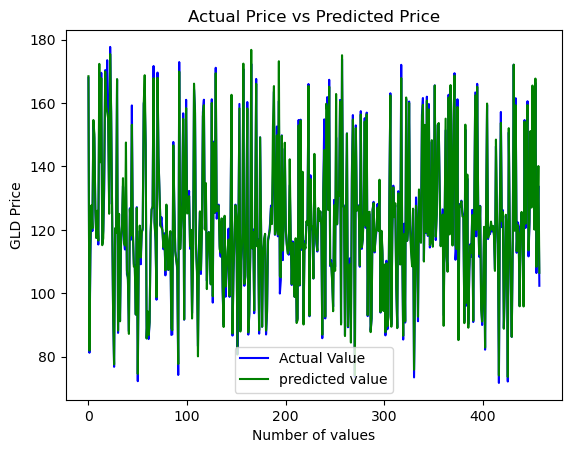

In [26]:
plt.plot(y_test,color='Blue',label='Actual Value')
plt.plot(test_data_prediction,color='Green',label='predicted value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()